<a href="https://colab.research.google.com/github/Suhani1221/Suhani1221.github.io/blob/main/watch_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAP INFRASTRUCURAL DATA WITH SUBURBS

To map infrastructural data to their respective suburbs using OSM API :
The following code uses the longitude and latitude values from the dataset and returns the suburb value from the coordinates. The dataset can be found in the folder : Datasets_without_suburbs.
The dataset with attached suburb name can be found in the folder : Datsets_with_suburbs

In [ ]:
import json
import requests

def get_suburb_from_coords(latitude, longitude):
    url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude}&lon={longitude}&zoom=18&addressdetails=1"
    response = requests.get(url)
    data = response.json()
    suburb = data['address']['suburb'] if 'suburb' in data['address'] else None
    # return suburb

# Load latitude and longitude coordinates from JSON file
with open('residential.json', 'r') as file: #Replace "residential.json" with the required input file
    coordinates_data = json.load(file)

for coord in coordinates_data:
    latitude = coord['location']['lat']  # Fixed the indexing
    longitude = coord['location']['lon'] # Fixed the indexing
    suburb = get_suburb_from_coords(latitude, longitude)
    coord['suburb'] = suburb  # Add suburb information to the coordinate dictionary



# Write the updated data to a new output file
output_file_path = 'residential-with-suburbs.json'
with open(output_file_path, 'w') as file:
    json.dump(coordinates_data, file, indent=4)

print(f"Data with suburbs saved to {output_file_path}")

PLOT ON ACTUAL MAP

The following code plots the location of public washrooms on the actual map which gets saved in a html file:
The Data section can be replaced with any other dataset from the Dataset_with_suburbs folder.

In [ ]:
import pandas as pd
import folium

# Load data
data =[
    {
        "name": "Public Toilet - Toilet 140 - Queensberry Street (Opposite 286 Queensberry Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.8039946349673,
        "lon": 144.95909066756946,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 6 - Elizabeth Street (Toilet Adjacent 200 Elizabeth Street)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81383779217631,
        "lon": 144.96309721024045,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 142 - Queensberry Street (Adjacent 179 Queensberry Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80463970714722,
        "lon": 144.96285021945613,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Royal Park Brens Pavilion",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78622124839705,
        "lon": 144.9550008758734,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 177 - Bellair Street (Opposite 180 Bellair Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79373229128235,
        "lon": 144.9303518616331,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Toilet 118 - Fitzroy Gardens (2 Lansdowne Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.815278082082735,
        "lon": 144.97758877995486,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 34 - Franklin Street (Opposite 80 Franklin Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.8082334704767,
        "lon": 144.9601868749377,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Town Hall Melbourne (200 Collins Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.81521576619692,
        "lon": 144.96694328510318,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 131 - Royal Park (Flemington Rd - Near North Park Tennis Club)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.790174410412384,
        "lon": 144.94366905096865,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 146 - Swanston Street (Opposite 475-511 Swanston Street)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80680576738025,
        "lon": 144.96264850030644,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 3 - Flinders Street (399 Flinders Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81940611413847,
        "lon": 144.96127683121782,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 48 - Birrarung Marr (Opposite Artplay)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81859887229392,
        "lon": 144.97105956826815,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 104 - Kings Domain South (off Birdwood Avenue)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.83084912404898,
        "lon": 144.97518226820782,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 46 - Bourke Street (opposite 225 Bourke Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81324543360198,
        "lon": 144.9668965896814,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 109 - Kings Domain Myer Music Bowl Rear of",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.82289159858857,
        "lon": 144.975280957334,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 55 - Royal Park (Nature Play, Opposite 51 Gatehouse Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.795523148389,
        "lon": 144.95214296280201,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 112 - Alexandra Gardens (Riverslide Skate Park)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.8203552728411,
        "lon": 144.9733129088743,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 41 - Flinders Street (No 245 Flinders Street Station)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81790319705616,
        "lon": 144.9662642552638,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 136 - Ievers Reserve - Flemington Road",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79679899805757,
        "lon": 144.95196665126468,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 106 - Kings Domain Government House Drive",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.82691574923448,
        "lon": 144.9746477838788,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Queen Victoria Market (153 Victoria Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.806121499077804,
        "lon": 144.95653844268273,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Victoria Harbour, Shed 3 (North Wharf Road)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.819795975740334,
        "lon": 144.93766540530564,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 128 - Princes Park South Playground (Princes Park Drive)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.785598387452595,
        "lon": 144.9630353603256,
        "suburb": "Carlton North"
    },
    {
        "name": "Public Toilet - Saint Mangos Lane, The Palladio (New Quay)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81435831108069,
        "lon": 144.94168216712015,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 4 - Market Street (Opposite 74 Market Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81746989209639,
        "lon": 144.96025433528794,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 138 - Carlton Gardens North (Opposite 199 Rathdowne Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80264555498511,
        "lon": 144.96982128721504,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 133- Canning Street Reserve (49 Princes Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79301167872576,
        "lon": 144.97399489761827,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 102 - Fawkner Park, North Pavilion (Male)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.840147692965054,
        "lon": 144.98138308753735,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Toilet 173 - JJ Holland Park, Skate Park (113 Kensington Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.798064023886866,
        "lon": 144.92110584392117,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Toilet 36 - Lonsdale Street (Opposite 424 Lonsdale Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "U",
        "lat": -37.8129330992456,
        "lon": 144.9600121469519,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 137 - Faraday Street (Opposite 208-212 Faraday Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.798709597015986,
        "lon": 144.9675938800973,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 105 -Sturt Street Reserve (280 Sturt Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.830132537548096,
        "lon": 144.96501222835187,
        "suburb": "Southbank"
    },
    {
        "name": "Public Toilet - Royal Park Golf Course Club House",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78187131786685,
        "lon": 144.95614252894822,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Newmarket Reserve (26 Smithfield Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78848882114304,
        "lon": 144.9235637219743,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Toilet 13 - Exhibition Street (Opposite 77 Exhibition Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81384641664995,
        "lon": 144.9713740947211,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 127 - Princes Park Royal Parade (near Park Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.778949609006396,
        "lon": 144.96046591899102,
        "suburb": "Carlton North"
    },
    {
        "name": "Public Toilet - Toilet 111 - Birrarung Marr Speakers Corner",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.821004779775386,
        "lon": 144.97593322373976,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 102 - Fawkner Park, North Pavilion (Female)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.84001779326322,
        "lon": 144.98122701462214,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Queen Victoria Market - (Meat Hall / \"H\" Shed)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80682129201847,
        "lon": 144.95874700464088,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 122 - Treasury Gardens (Store and Toilet)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81341843500891,
        "lon": 144.97746700744847,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 120 - Royal Park, Wetland (off Oak Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78303248417686,
        "lon": 144.94185635299425,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 103 - Kings Domain South (Opposite 169 Domain Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.83393826633729,
        "lon": 144.9817840463506,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Queen Victoria Market (465 Queen Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.80783122147196,
        "lon": 144.95795526595654,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 178 -  Argyle Place North (Opposite 4 Argyle Place North)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80207629420745,
        "lon": 144.96642403988702,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 100 - Royal Park - Native Garden (off Gatehouse Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79251146448698,
        "lon": 144.95685172084129,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 125 - Gordon Reserve (74-108 Spring Street)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81224077558713,
        "lon": 144.97392555886628,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 52 - Princes Park (Adjacent Southern Sports Pavilion)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.787904827147685,
        "lon": 144.95949479077186,
        "suburb": "Carlton North"
    },
    {
        "name": "Public Toilet - Toilet 179 - Lincoln Square (138-142 Bouverie Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80271182455448,
        "lon": 144.96226812695767,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 43 - Queen Street (opposite 113 Queen Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.815838165017645,
        "lon": 144.96106207300267,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 110 - Queen Victoria Gardens (Linlithgow Avenue)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.822948288677665,
        "lon": 144.97098568179823,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 154 - Flagstaff Gardens (cnr William & Dudley)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.808913242351316,
        "lon": 144.95504018635694,
        "suburb": "West Melbourne"
    },
    {
        "name": "Public Toilet - Victoria Harbour, Shed 2 (North Wharf Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.818924455699296,
        "lon": 144.9342385117904,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 14 - Flinders Street (27 Flinders Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81598982599987,
        "lon": 144.97279836576897,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 107 - Alexandra Park",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.82764304616528,
        "lon": 144.9818116607595,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 169 - Batman Park (2A Spencer Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.821720681669966,
        "lon": 144.95557809313962,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 6 - Elizabeth Street (Toilet Adjacent 200 Elizabeth Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81343920794399,
        "lon": 144.96292272645067,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 1 - Lonsdale Street (Opposite 581 Lonsdale Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.814345522392365,
        "lon": 144.9551179464378,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 145 - Carlton Gardens South (Opposite 39 Rathdowne Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80625893301874,
        "lon": 144.9692027022002,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 7 - Latrobe Street (Adjacent 120 La Trobe Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80894206847336,
        "lon": 144.9656488455227,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 124 - Nicholson Street (1A Nicholson Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80945202894246,
        "lon": 144.97307695563703,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 181 - Point Park (Point Park Crescent)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.82331083443533,
        "lon": 144.94182760665478,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Ron Barassi Senior Park Pavilion",
        "female": "U",
        "male": "U",
        "wheelchair": "U",
        "operator": "City of Melbourne",
        "baby_facil": "U",
        "lat": -37.81722059052804,
        "lon": 144.93400271183998,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 11 - Lonsdale Street (Opposite 88 Lonsdale Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.810035679928596,
        "lon": 144.96990246330486,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 12 - Exhibition Street (Opposite 242 Exhibition Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80954604636232,
        "lon": 144.9694071187106,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 117 - Powlett Reserve (Opposite 128 Albert Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81094232809633,
        "lon": 144.98685873937842,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 182 - Docklands Park South - 25 Harbour Esplanade",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.82175860330799,
        "lon": 144.94738341867807,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 170 - Queensberry Street (Opposite 530 Queensberry Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80307786641225,
        "lon": 144.94986517956968,
        "suburb": "North Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 42 - Fawkner Park, Opposite 55 Commercial Road",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.845206563009405,
        "lon": 144.9826144313013,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Toilet 162 - JJ Holland Park (Opposite, 48 Altona Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79812546150608,
        "lon": 144.92642466756246,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Queen Victoria Market (Food Court - 65-81 Victoria Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80637961897052,
        "lon": 144.95905779158946,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 44 - Fawkner Park, Opposite 150W Toorak Road",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.83825284124979,
        "lon": 144.98438921994168,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Toilet 172 - Southbank Promenade (opposite Esso House)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.82034212858627,
        "lon": 144.96421972799456,
        "suburb": "Southbank"
    },
    {
        "name": "Public Toilet - Toilet 13 - Queensberry Street (Opposite 530 Queensberry Street)",
        "female": None,
        "male": None,
        "wheelchair": None,
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.803094275484256,
        "lon": 144.94994632091922,
        "suburb": "North Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 119 - Fitzroy Gardens Toilets (150 Clarendon Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81203615704364,
        "lon": 144.98307493665166,
        "suburb": "East Melbourne"
    }
]
# Convert data to DataFrame
df = pd.DataFrame(data)

# Get unique suburbs
unique_suburbs = df['suburb'].unique()

# Define a set of colors for each suburb
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'lightblue', 'darkgreen', 'lightgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightgray', 'gray', 'black', 'lightyellow', 'darkyellow']

# Create a color mapping for each suburb
suburb_color_mapping = {suburb: colors[i % len(colors)] for i, suburb in enumerate(unique_suburbs)}

# Create a map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

for index, row in df.iterrows():
    color = suburb_color_mapping[row['suburb']]
    folium.Marker([row['lat'], row['lon']], popup=row['name'], icon=folium.Icon(color=color)).add_to(melbourne_map)



# Add legend to the map
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 200px; height: 300px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">&nbsp;<b>Legend</b><br>'''

for suburb, color in suburb_color_mapping.items():
    legend_html += f'&nbsp;<i class="fa fa-circle" style="color:{color}"></i>&nbsp;{suburb}<br>'

legend_html += '</div>'
melbourne_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
melbourne_map.save('melbourne_public_washrooms_with_legend.html')


PLOT ON BOUNDARY MAP

The following code plots the data on a boundary map of Melbourne using the geojson file describing the boundaries of the suburbs in Melbourne :

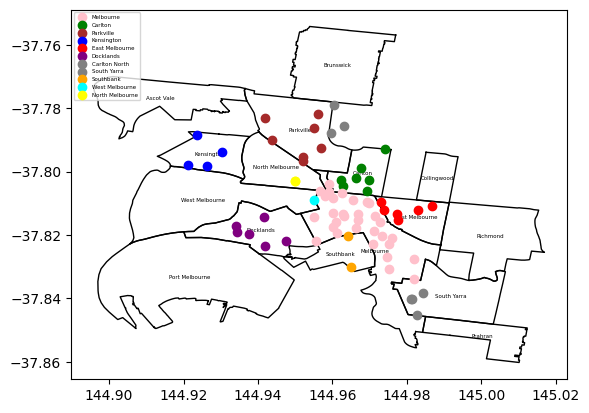

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_file = 'export.geojson'
gdf = gpd.read_file(geojson_file)

colors = {'Carlton':'darkgrey','Collingwood':'lightgrey','Richmond':'magenta','Prahran':'cadetblue','Brunswick':'lightblue','Ascot Vale':'lightgreen','Princess Hill':'lightred','Flemingotn':'beige','Port Melbourne':'violet','West Melbourne':'aqua','Kensington': 'blue', 'East Melbourne': 'red', 'Carlton': 'green', 'Docklands': 'purple', 'Southbank': 'orange', 'North Melbourne': 'yellow', 'Melbourne': 'pink', 'Parkville': 'brown', 'South Yarra': 'gray'}

# Filter only the boundary data for selected suburbs
selected_suburbs = list(colors.keys())
boundary_gdf = gdf[(gdf['type'] == 'boundary') & (gdf['name'].isin(selected_suburbs))]

# Plot the boundary lines and label the suburbs
for index, row in boundary_gdf.iterrows():
    plt.plot(*row['geometry'].exterior.xy, color='black', linewidth=1)
    plt.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=4, ha='center', va='center')

# Data of childcare centers
childcare_centers =[
    {
        "name": "Public Toilet - Toilet 140 - Queensberry Street (Opposite 286 Queensberry Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.8039946349673,
        "lon": 144.95909066756946,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 6 - Elizabeth Street (Toilet Adjacent 200 Elizabeth Street)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81383779217631,
        "lon": 144.96309721024045,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 142 - Queensberry Street (Adjacent 179 Queensberry Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80463970714722,
        "lon": 144.96285021945613,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Royal Park Brens Pavilion",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78622124839705,
        "lon": 144.9550008758734,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 177 - Bellair Street (Opposite 180 Bellair Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79373229128235,
        "lon": 144.9303518616331,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Toilet 118 - Fitzroy Gardens (2 Lansdowne Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.815278082082735,
        "lon": 144.97758877995486,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 34 - Franklin Street (Opposite 80 Franklin Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.8082334704767,
        "lon": 144.9601868749377,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Town Hall Melbourne (200 Collins Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.81521576619692,
        "lon": 144.96694328510318,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 131 - Royal Park (Flemington Rd - Near North Park Tennis Club)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.790174410412384,
        "lon": 144.94366905096865,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 146 - Swanston Street (Opposite 475-511 Swanston Street)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80680576738025,
        "lon": 144.96264850030644,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 3 - Flinders Street (399 Flinders Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81940611413847,
        "lon": 144.96127683121782,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 48 - Birrarung Marr (Opposite Artplay)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81859887229392,
        "lon": 144.97105956826815,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 104 - Kings Domain South (off Birdwood Avenue)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.83084912404898,
        "lon": 144.97518226820782,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 46 - Bourke Street (opposite 225 Bourke Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81324543360198,
        "lon": 144.9668965896814,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 109 - Kings Domain Myer Music Bowl Rear of",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.82289159858857,
        "lon": 144.975280957334,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 55 - Royal Park (Nature Play, Opposite 51 Gatehouse Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.795523148389,
        "lon": 144.95214296280201,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 112 - Alexandra Gardens (Riverslide Skate Park)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.8203552728411,
        "lon": 144.9733129088743,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 41 - Flinders Street (No 245 Flinders Street Station)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81790319705616,
        "lon": 144.9662642552638,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 136 - Ievers Reserve - Flemington Road",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79679899805757,
        "lon": 144.95196665126468,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 106 - Kings Domain Government House Drive",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.82691574923448,
        "lon": 144.9746477838788,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Queen Victoria Market (153 Victoria Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.806121499077804,
        "lon": 144.95653844268273,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Victoria Harbour, Shed 3 (North Wharf Road)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.819795975740334,
        "lon": 144.93766540530564,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 128 - Princes Park South Playground (Princes Park Drive)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.785598387452595,
        "lon": 144.9630353603256,
        "suburb": "Carlton North"
    },
    {
        "name": "Public Toilet - Saint Mangos Lane, The Palladio (New Quay)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81435831108069,
        "lon": 144.94168216712015,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 4 - Market Street (Opposite 74 Market Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81746989209639,
        "lon": 144.96025433528794,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 138 - Carlton Gardens North (Opposite 199 Rathdowne Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80264555498511,
        "lon": 144.96982128721504,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 133- Canning Street Reserve (49 Princes Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79301167872576,
        "lon": 144.97399489761827,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 102 - Fawkner Park, North Pavilion (Male)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.840147692965054,
        "lon": 144.98138308753735,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Toilet 173 - JJ Holland Park, Skate Park (113 Kensington Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.798064023886866,
        "lon": 144.92110584392117,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Toilet 36 - Lonsdale Street (Opposite 424 Lonsdale Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "U",
        "lat": -37.8129330992456,
        "lon": 144.9600121469519,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 137 - Faraday Street (Opposite 208-212 Faraday Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.798709597015986,
        "lon": 144.9675938800973,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 105 -Sturt Street Reserve (280 Sturt Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.830132537548096,
        "lon": 144.96501222835187,
        "suburb": "Southbank"
    },
    {
        "name": "Public Toilet - Royal Park Golf Course Club House",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78187131786685,
        "lon": 144.95614252894822,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Newmarket Reserve (26 Smithfield Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78848882114304,
        "lon": 144.9235637219743,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Toilet 13 - Exhibition Street (Opposite 77 Exhibition Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81384641664995,
        "lon": 144.9713740947211,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 127 - Princes Park Royal Parade (near Park Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.778949609006396,
        "lon": 144.96046591899102,
        "suburb": "Carlton North"
    },
    {
        "name": "Public Toilet - Toilet 111 - Birrarung Marr Speakers Corner",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.821004779775386,
        "lon": 144.97593322373976,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 102 - Fawkner Park, North Pavilion (Female)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.84001779326322,
        "lon": 144.98122701462214,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Queen Victoria Market - (Meat Hall / \"H\" Shed)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80682129201847,
        "lon": 144.95874700464088,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 122 - Treasury Gardens (Store and Toilet)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81341843500891,
        "lon": 144.97746700744847,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 120 - Royal Park, Wetland (off Oak Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.78303248417686,
        "lon": 144.94185635299425,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 103 - Kings Domain South (Opposite 169 Domain Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.83393826633729,
        "lon": 144.9817840463506,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Queen Victoria Market (465 Queen Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.80783122147196,
        "lon": 144.95795526595654,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 178 -  Argyle Place North (Opposite 4 Argyle Place North)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80207629420745,
        "lon": 144.96642403988702,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 100 - Royal Park - Native Garden (off Gatehouse Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79251146448698,
        "lon": 144.95685172084129,
        "suburb": "Parkville"
    },
    {
        "name": "Public Toilet - Toilet 125 - Gordon Reserve (74-108 Spring Street)",
        "female": "yes",
        "male": "no",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81224077558713,
        "lon": 144.97392555886628,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 52 - Princes Park (Adjacent Southern Sports Pavilion)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.787904827147685,
        "lon": 144.95949479077186,
        "suburb": "Carlton North"
    },
    {
        "name": "Public Toilet - Toilet 179 - Lincoln Square (138-142 Bouverie Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80271182455448,
        "lon": 144.96226812695767,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 43 - Queen Street (opposite 113 Queen Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.815838165017645,
        "lon": 144.96106207300267,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 110 - Queen Victoria Gardens (Linlithgow Avenue)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.822948288677665,
        "lon": 144.97098568179823,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 154 - Flagstaff Gardens (cnr William & Dudley)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.808913242351316,
        "lon": 144.95504018635694,
        "suburb": "West Melbourne"
    },
    {
        "name": "Public Toilet - Victoria Harbour, Shed 2 (North Wharf Road)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.818924455699296,
        "lon": 144.9342385117904,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 14 - Flinders Street (27 Flinders Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81598982599987,
        "lon": 144.97279836576897,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 107 - Alexandra Park",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.82764304616528,
        "lon": 144.9818116607595,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 169 - Batman Park (2A Spencer Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.821720681669966,
        "lon": 144.95557809313962,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 6 - Elizabeth Street (Toilet Adjacent 200 Elizabeth Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81343920794399,
        "lon": 144.96292272645067,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 1 - Lonsdale Street (Opposite 581 Lonsdale Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.814345522392365,
        "lon": 144.9551179464378,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 145 - Carlton Gardens South (Opposite 39 Rathdowne Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80625893301874,
        "lon": 144.9692027022002,
        "suburb": "Carlton"
    },
    {
        "name": "Public Toilet - Toilet 7 - Latrobe Street (Adjacent 120 La Trobe Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80894206847336,
        "lon": 144.9656488455227,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 124 - Nicholson Street (1A Nicholson Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80945202894246,
        "lon": 144.97307695563703,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 181 - Point Park (Point Park Crescent)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.82331083443533,
        "lon": 144.94182760665478,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Ron Barassi Senior Park Pavilion",
        "female": "U",
        "male": "U",
        "wheelchair": "U",
        "operator": "City of Melbourne",
        "baby_facil": "U",
        "lat": -37.81722059052804,
        "lon": 144.93400271183998,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 11 - Lonsdale Street (Opposite 88 Lonsdale Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.810035679928596,
        "lon": 144.96990246330486,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 12 - Exhibition Street (Opposite 242 Exhibition Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80954604636232,
        "lon": 144.9694071187106,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 117 - Powlett Reserve (Opposite 128 Albert Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81094232809633,
        "lon": 144.98685873937842,
        "suburb": "East Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 182 - Docklands Park South - 25 Harbour Esplanade",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "yes",
        "lat": -37.82175860330799,
        "lon": 144.94738341867807,
        "suburb": "Docklands"
    },
    {
        "name": "Public Toilet - Toilet 170 - Queensberry Street (Opposite 530 Queensberry Street)",
        "female": "no",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80307786641225,
        "lon": 144.94986517956968,
        "suburb": "North Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 42 - Fawkner Park, Opposite 55 Commercial Road",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.845206563009405,
        "lon": 144.9826144313013,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Toilet 162 - JJ Holland Park (Opposite, 48 Altona Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.79812546150608,
        "lon": 144.92642466756246,
        "suburb": "Kensington"
    },
    {
        "name": "Public Toilet - Queen Victoria Market (Food Court - 65-81 Victoria Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "no",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.80637961897052,
        "lon": 144.95905779158946,
        "suburb": "Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 44 - Fawkner Park, Opposite 150W Toorak Road",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.83825284124979,
        "lon": 144.98438921994168,
        "suburb": "South Yarra"
    },
    {
        "name": "Public Toilet - Toilet 172 - Southbank Promenade (opposite Esso House)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.82034212858627,
        "lon": 144.96421972799456,
        "suburb": "Southbank"
    },
    {
        "name": "Public Toilet - Toilet 13 - Queensberry Street (Opposite 530 Queensberry Street)",
        "female": None,
        "male": None,
        "wheelchair": None,
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.803094275484256,
        "lon": 144.94994632091922,
        "suburb": "North Melbourne"
    },
    {
        "name": "Public Toilet - Toilet 119 - Fitzroy Gardens Toilets (150 Clarendon Street)",
        "female": "yes",
        "male": "yes",
        "wheelchair": "yes",
        "operator": "City of Melbourne",
        "baby_facil": "no",
        "lat": -37.81203615704364,
        "lon": 144.98307493665166,
        "suburb": "East Melbourne"
    }
]
# Plot childcare centers for selected suburbs only
legend_handles = {}
default_color = "grey"
# Iterate through childcare centers and plot each one
for center in childcare_centers:
    suburb = center["suburb"]
    lon, lat = center["lon"], center["lat"]

    # Assign color based on the suburb, use default color if suburb is not in colors dictionary
    color = colors.get(suburb, default_color)

    # Add to legend_handles if suburb is not already there
    if suburb not in legend_handles:
        legend_handles[suburb] = plt.scatter([], [], color=color, label=suburb, zorder=5)

    # Plot the center
    plt.scatter(lon, lat, color=color, zorder=5)

# Add legend with unique labels
plt.legend(handles=list(legend_handles.values()), loc='upper left', fontsize=4)

# Show plot
plt.show()


HEATMAP

The following code makes a heatmap of the distribution of data with respect to suburb :

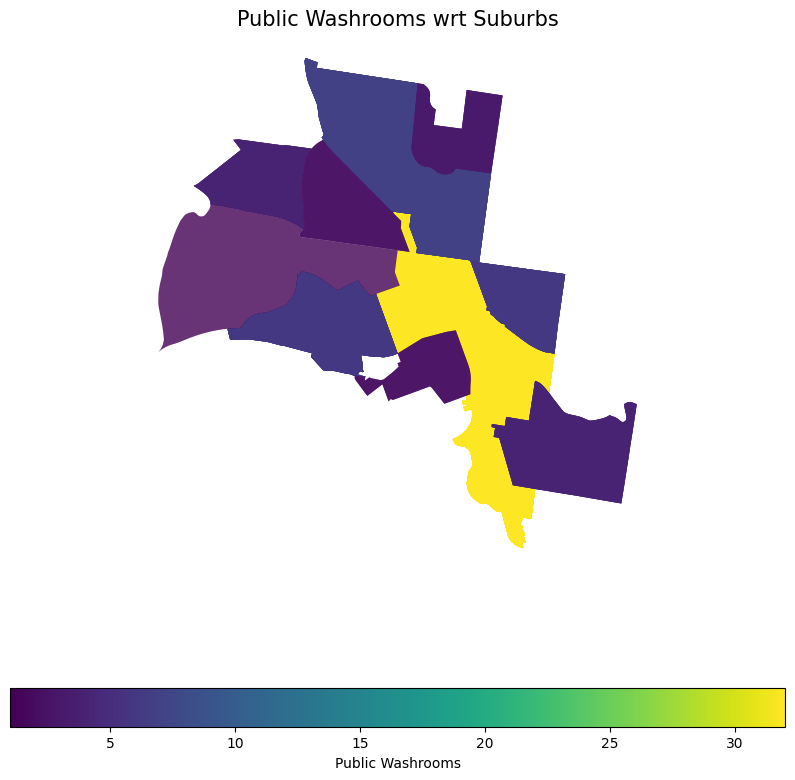

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

# Load the GeoJSON data
geo_data = gpd.read_file('export.geojson')
geo_data.head()

geo_data = geo_data[['id', 'admin_level',  'boundary', 'name', 'population', 'postal_code',  'type', 'wikidata','wikipedia', 'geometry']]
geo_data = geo_data.rename(columns={"name":"SA2"})
geo_data.head()

# Load the homelessness data
data = pd.read_csv('public_washrooms.csv')
data['SA2'] = data['SA2'].str.replace(r'[().-]', '', regex=True)
data['SA2'] = data['SA2'].str.replace(r'\s+', ' ', regex=True)
data.head()

data = pd.merge(data, geo_data, on='SA2', how='inner')
data.head()

data['geometry'][1]
data = gpd.GeoDataFrame(data, geometry='geometry')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data.plot(column='count', ax=ax, cmap='viridis', alpha=0.8, legend=True,
                       legend_kwds={'label': "Public Washrooms", 'orientation': "horizontal"})

# # # Adding city names with adjusted text
# for idx, row in data.iterrows():
#     ax.annotate(text=row['SA2'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
#                 xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')


ax.set_title('Public Washrooms wrt Suburbs', fontsize=15)
ax.set_axis_off()
plt.show()

The following code counts the number of childcare centres with respect to their suburbs :

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('public_washrooms.csv')

# Group the DataFrame by 'SA2' (suburb) and count the number of childcare centres in each suburb
counts = df.groupby('SA2').size()

# Add a new column 'count' to the DataFrame with the counts for each suburb
df['count'] = df['SA2'].map(counts)

# Save the updated DataFrame back to the CSV file

df.to_csv('public_washrooms.csv', index=False)


To perform coorelation analysis use the following script. Any attribute can be added in the "Selected Factors" field.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data from CSV file with error handling for different encodings
file_path = 'suburbs_compressed_updated.csv'  # Update the path to your CSV file

# Try reading the CSV with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to read the file with encoding {encoding}: {e}")
else:
    print("All encodings failed. Please check the file format.")
    exit()

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Step 2: Pivot the DataFrame to turn SDH factors into columns
# Exclude the 'Suburbs' column from index to remove it from the labels
df_pivoted = df.set_index('Suburbs').T

# Display the pivoted DataFrame to verify
print("Pivoted DataFrame:")
print(df_pivoted.head())

# Step 3: Select specific SDH factors for correlation analysis
# Update the following list with your actual SDH factors after checking the pivoted DataFrame
selected_factors = [
    'NUMBER OF CHILDCARE CENTRES',
    'INDUSTRY OF EMPLOYMENT BY HOURS WORKED BY SEX_FEMALES_Financial and Insurance Services_20-29 hours'
]

# Filter the DataFrame to include only the selected factors
df_selected = df_pivoted[selected_factors]

# Convert columns to numeric, if necessary
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Step 4: Compute the correlation matrix for the selected factors
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print("Correlation Matrix for Selected Factors:")
print(correlation_matrix)

# Define alternative labels for x and y axes
alternative_labels = [
    'Childcare Centres',
    'Female Employment'
]

# Optionally, visualize the correlation matrix with adjusted font size and alternative labels
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"fontsize":8},
                      xticklabels=alternative_labels, yticklabels=alternative_labels)
plt.xticks(rotation=0,fontsize=6)  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0,fontsize=6)   # Keep y-axis labels horizontal
plt.title('Correlation Matrix for Selected Factors')
plt.show()
